In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
prop = pd.read_csv("properatti.csv",sep=',')

In [3]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [4]:
## for col in prop: 
##    print(prop[col].unique())
##    print('\t''\t')

In [5]:
prop.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [6]:
prop['Unnamed: 0'].unique() #es un contador de registros, parece no tener sentido tenerlo

array([     0,      1,      2, ..., 121217, 121218, 121219])

In [7]:
prop['operation'].unique() #son todos ventas, se podria borrar

array(['sell'], dtype=object)

In [8]:
prop['property_type'].unique() #store lo separaria para hacer un analisis aparte porque seguramente el modelo predictor \
                               # deba ser otro

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [9]:
prop['place_name'].unique()

array(['Mataderos', 'La Plata', 'Liniers', ..., 'Laguna Paiva',
       'Malabrigo', 'Altos de Hudson I'], dtype=object)

In [10]:
prop['place_with_parent_names'].unique()

array(['|Argentina|Capital Federal|Mataderos|',
       '|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|',
       '|Argentina|Capital Federal|Liniers|', ...,
       '|Argentina|Santa Fe|Laguna Paiva|',
       '|Argentina|Santa Fe|Malabrigo|',
       '|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|Altos de Hudson I|'],
      dtype=object)

In [11]:
prop['country_name'].unique() # todos los registros corresponden a Argentina, es una columna sin valor para nosostros

array(['Argentina'], dtype=object)

In [12]:
prop['state_name'].unique() #corresponde al nombre de Provincia, salvo GBA que lo separa por zona

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
       'Salta', 'Neuquén', 'Río Negro', 'San Luis', 'Mendoza',
       'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco', 'San Juan',
       'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [13]:
prop['price'].dtype

dtype('float64')

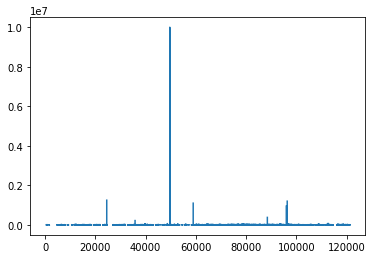

In [14]:
plt.plot(prop['expenses'])

In [15]:
prop['expenses'].describe()

count    1.426200e+04
mean     5.009234e+03
std      1.204403e+05
min      1.000000e+00
25%      1.000000e+03
50%      2.000000e+03
75%      4.000000e+03
max      1.000150e+07
Name: expenses, dtype: float64

In [16]:
prop['currency'].unique()

array(['USD', nan, 'ARS', 'PEN', 'UYU'], dtype=object)

In [17]:
prop['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [18]:
prop[(prop['currency']=='PEN')] ## registros con distinta moneda y sin informacion de m2 y sup2, a eliminar

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
50387,50387,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e8z_venta_depart...,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...,DUPLEX A LA VENTA | Liniers 1200 | Tandil,https://thumbs4.properati.com/9/N_Qr_5X_vOq--b...
50388,50388,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e90_venta_depart...,Ref.: 56Duplex en venta de 1 dormitorio con ap...,DUPLEX A LA VENTA | Liniers 1200 | Tandil,https://thumbs4.properati.com/8/_cBXAyr_9pDySg...


In [19]:
prop[(prop['currency']=='UYU')] ## registros con distinta moneda y sin informacion de m2 y sup2, a eliminar

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
107390,107390,sell,house,San Roque,|Argentina|Mendoza|San Roque|,Argentina,Mendoza,3836586.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1by0s_venta_casa_s...,"Casa con Calefacción central, Mendoza, San Roq...",Casa - San Vicente,https://thumbs4.properati.com/2/pA0RbuDKRK6GgV...


In [20]:
#Eliminamos los valores redundantes para nuestro análisis:
#Country_name y Operation que lo demostramos antes
#ELiminamos también image_thumbnail y properati_url porque no son relevante para nuestro análisis
prop.drop(['image_thumbnail', 'properati_url','operation','country_name',], axis=1, inplace=True)
prop.columns

Index(['Unnamed: 0', 'property_type', 'place_name', 'place_with_parent_names',
       'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon', 'price',
       'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'description', 'title'],
      dtype='object')

In [21]:
# Remplazaremos nombres de columnas y reorganizaremos su ordenamiento
prop.columns = ['id', 't_prop', 'localidad', 'lugar_completo',
       'provincia', 'geonames_id', 'lat-lon', 'lat', 'lon', 'precio_original',
       'moneda_original', 'precio_$', 'precio_u$s_aprox',
       'sup_tot_m2', 'sup_cub_m2', 'precio_m2_u$s',
       'precio_m2', 'piso', 'ambientes', 'expenses?', 'descr', 'tit']

In [45]:
prop.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,121220,NaN,NaN,NaN,60609.5,34993.3,0,30304.8,60609.5,90914.2,121219
t_prop,121220,4,apartment,71065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localidad,121197,1060,Córdoba,9254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lugar_completo,121220,1164,|Argentina|Santa Fe|Rosario|,8504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
provincia,121220,28,Capital Federal,32316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geonames_id,102503,NaN,NaN,NaN,3.57444e+06,354131,3.42721e+06,3.43023e+06,3.43391e+06,3.83667e+06,6.9489e+06
lat-lon,69670,47203,"-34.4026444,-58.6684776",312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,69670,NaN,NaN,NaN,-34.6262,1.98094,-54.824,-34.6691,-34.598,-34.4413,4.54584
lon,69670,NaN,NaN,NaN,-59.2663,2.29992,-75.6789,-58.727,-58.4801,-58.3959,-53.7333
precio_original,100810,NaN,NaN,NaN,468526,2.2601e+06,0,110000,185000,420000,6.5e+08


In [42]:
prop.pivot_table('precio_m2',index=['provincia'],columns='t_prop',aggfunc=['count','mean'])

/opt/conda/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:45: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


count                                     mean  \
t_prop                            PH apartment    house   store            PH   
Bs.As. G.B.A. Zona Norte       904.0    9321.0  11822.0   471.0   2185.965302   
Bs.As. G.B.A. Zona Oeste       630.0    2724.0   2752.0   160.0   2683.021801   
Bs.As. G.B.A. Zona Sur         602.0    4128.0   4797.0   380.0   4481.244330   
Buenos Aires Costa Atlántica   389.0    4502.0   1884.0   149.0   1835.383299   
Buenos Aires Interior           33.0     564.0    808.0    36.0   5762.458755   
Capital Federal               1676.0   22878.0   1722.0  1048.0   3365.845869   
Catamarca                        NaN      11.0     10.0     NaN           NaN   
Chaco                            NaN       7.0     18.0     3.0           NaN   
Chubut                           0.0      13.0     32.0     5.0           NaN   
Corrientes                      54.0     110.0    247.0    11.0   1428.884584   
Córdoba                        140.0    3451.0   2677.0   188.0   8231.737039   
Entre Ríos                       1.0      37.0     54.0     3.0   8461.538462   
Formosa                          NaN       0.0      0.0     NaN           NaN   
Jujuy                            NaN       2.0      8.0     0.0           NaN   
La Pampa                         NaN       6.0     11.0     2.0           NaN   
La Rioja                         NaN       0.0      2.0     NaN           NaN   
Mendoza                          2.0     248.0    170.0    10.0   1226.216814   
Misiones                         0.0      64.0    143.0     2.0           NaN   
Neuquén                         76.0     106.0     86.0     6.0  41813.725084   
Río Negro                        8.0     134.0     63.0    10.0  16862.576191   
Salta                            0.0      41.0     34.0     1.0           NaN   
San Juan                         NaN       2.0      2.0     0.0           NaN   
San Luis                         0.0      13.0    134.0     7.0           NaN   
Santa Cruz                       NaN       0.0      8.0     1.0           NaN   
Santa Fe                        36.0    3749.0    831.0    61.0  15481.808665   
Santiago Del Estero              NaN       1.0      2.0     NaN           NaN   
Tierra Del Fuego                 NaN       8.0     16.0     2.0           NaN   
Tucumán                          1.0      74.0     20.0     3.0  31944.444444   

                                                                        
t_prop                           apartment         house         store  
Bs.As. G.B.A. Zona Norte       7879.403882   2747.180205   4563.725042  
Bs.As. G.B.A. Zona Oeste       3713.208222   2648.707775  20146.324056  
Bs.As. G.B.A. Zona Sur         4915.368444   3412.730873  26481.949146  
Buenos Aires Costa Atlántica   4200.392763   1733.167027   1848.739810  
Buenos Aires Interior          8771.818506   2559.836921   2149.324623  
Capital Federal                6247.527918   6134.232267   7408.555892  
Catamarca                      4340.045004   3190.501987           NaN  
Chaco                         18415.849493  11457.331990   1220.982511  
Chubut                         4514.612608   4373.304714   1475.389194  
Corrientes                     2180.752464   2252.590731   1896.367490  
Córdoba                       21012.456874   6708.013796  13570.759149  
Entre Ríos                    17925.560545  10860.719356   1766.578296  
Formosa                                NaN           NaN           NaN  
Jujuy                         21610.915493  48690.881652           NaN  
La Pampa                      18305.142710  11005.267265  11000.000000  
La Rioja                               NaN   2438.888889           NaN  
Mendoza                        6476.346472  10196.656680   3507.887163  
Misiones                      21230.922242  26639.989509    209.116667  
Neuquén                       17760.826521   5614.698392   2313.161376  
Río Negro                      6855.165934   7918.909693  18672.813

In [ ]:
#crear temp_prop_precios = para analizar como rellenar los faltantes
#crear temp_prop_regex = para sacar info de 'descr' y 'tit'
#crear temp_prop_ubicacion = para completar filas con 'lugar_completo'
#crear temp_prop_georefer = para analizar y completar campos de lat-lon lat lon y geonames_id